## Life expectancy and probabilty of survival

Life expectancy can be defined as the average of additional years a given person still has to live. It can be calculated by observing a group of people born in the same year, during a certain period. For such a group of people, referred to (in this case) as a cohort, the probability of survival is the proportion of individuals to be alive after a given time.

The data used in this work contains the life expectancy and probability of survival calculated for a given cohort from 1991 to 2001. This data is made available on the Canadian government website. Each dataset is described by income, education, ancestry, gender and residence type.

Data:
<br>[Life expectancy](https://doi.org/10.25318/1310013401-eng)
<br>[Survival probability](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310013501)

**Disclaimer**: This notebook is for analysis purposes only.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data exploration

In [2]:
# Let's explore
pd.read_csv('Data/Life_expectancy.csv').head()
#pd.read_csv('Data/Probability_survival.csv').head()

,REF_DATE,GEO,DGUID,Population group,Age,Sex,Characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1991/2006,Canada,2016A000011124,Entire cohort,At 25 years,Both sexes,Life expectancy,Years,308,units,0,v54068144,1.1.1.1.1,55.2,NaN,NaN,NaN,1
1,1991/2006,Canada,2016A000011124,Entire cohort,At 25 years,Both sexes,"Low 95% confidence interval, life expectancy",Years,308,units,0,v54068145,1.1.1.1.2,55.2,NaN,NaN,NaN,1
2,1991/2006,Canada,2016A000011124,Entire cohort,At 25 years,Both sexes,"High 95% confidence interval, life expectancy",Years,308,units,0,v54068146,1.1.1.1.3,55.3,NaN,NaN,NaN,1
3,1991/2006,Canada,2016A000011124,Entire cohort,At 25 years,Males,Life expectancy,Years,308,units,0,v54068147,1.1.1.2.1,52.6,NaN,NaN,NaN,1
4,1991/2006,Canada,2016A000011124,Entire cohort,At 25 years,Males,"Low 95% confidence interval, life expectancy",Years,308,units,0,v54068148,1.1.1.2.2,52.5,NaN,NaN,NaN,1


Some features are not particularly needed for this analysis and can be dropped. Items in the "*VALUES*" column correspond to values of the probability of survival and life expectancy. "*Low 95% confidence interval, life expectancy*" and "*High 95% confidence interval, life expectancy*" represent the accuracy of the probability of survival (life expectancy). New columns for life expectancy and probability of survival can be created.

In [3]:
survival = pd.read_csv("Data/Probability_survival.csv",
    usecols=["Population group", "Age", "Sex", "Characteristics", "VALUE"]
    ).rename(columns={"Population group": "Population_group"})

expectancy = pd.read_csv("Data/Life_expectancy.csv",
    usecols=["Population group", "Age", "Sex", "Characteristics", "VALUE"]
    ).rename(columns={"Population group": "Population_group"})

#print(expectancy.head())

In [4]:
# Check for missing values
survival.isna().any()

Population_group    False
Age                 False
Sex                 False
Characteristics     False
VALUE               False
dtype: bool

In [5]:
# Making changes in Age column
survival['Age'] = survival['Age'].replace(r"At | years", '', regex=True)#.apply(pd.to_numeric)
expectancy['Age'] = expectancy['Age'].replace(r"At | years", '', regex=True)

# reset the index
survival_age = survival.set_index("Age")
expectancy_age = expectancy.set_index("Age")

survival_age.head()

,Population_group,Sex,Characteristics,VALUE
Age,,,,
25,Entire cohort,Both sexes,Probability of survival,100.0
25,Entire cohort,Both sexes,"Low 95% confidence interval, life expectancy",100.0
25,Entire cohort,Both sexes,"High 95% confidence interval, life expectancy",100.0
25,Entire cohort,Males,Probability of survival,100.0
25,Entire cohort,Males,"Low 95% confidence interval, life expectancy",100.0


The *Population_group* column contains information on the entire cohort, the income, education, residence and ancestry

In [6]:
#survival.Population_group.unique()
expectancy.Population_group.unique()

array(['Entire cohort', 'Income adequacy quintile 1 (lowest)',
       'Income adequacy quintile 2', 'Income adequacy quintile 3',
       'Income adequacy quintile 4',
       'Income adequacy quintile 5 (highest)',
       'Educational attainment - less than secondary graduation',
       'Educational attainment - secondary graduation',
       'Educational attainment - postsecondary diploma',
       'Educational attainment - university degree',
       'Resident of shelter or rooming house or hotel', 'Hotel',
       'Rooming house', 'Shelter', 'First Nations', 'Registered Indian',
       'Non-Status Indian', 'Métis ancestry', 'Non-Aboriginal'],
      dtype=object)

### Probablity of survival at 60 years old based on gender and ancestry

In [7]:
grouped = survival_age.groupby("Population_group")
ancestry = ['First Nations', 'Registered Indian','Non-Status Indian', 'Métis ancestry', 
            'Non-Aboriginal']
ancestry_group = pd.concat([grouped.get_group(item) for item in ancestry])
survival_gender = ancestry_group.loc[ancestry_group.Characteristics=="Probability of survival"].drop(
    columns="Characteristics")

survival_by_ancestry = survival_gender.loc[survival_gender.Sex=="Both sexes"].rename(
    columns={"VALUE": "Both sexes"}).drop(columns="Sex")
survival_by_ancestry["Male"] = survival_gender.loc[survival_gender.Sex=="Males"]["VALUE"]
survival_by_ancestry["Female"] = survival_gender.loc[survival_gender.Sex=="Females"]["VALUE"]

survival_by_ancestry.head()


,Population_group,Both sexes,Male,Female
Age,,,,
25,First Nations,100.0,100.0,100.0
30,First Nations,99.0,98.6,99.4
35,First Nations,97.9,97.0,98.7
40,First Nations,96.6,95.5,97.6
45,First Nations,94.8,93.5,96.2


Text(0.5, 1.0, 'Probabilty of survival base on ancestry')

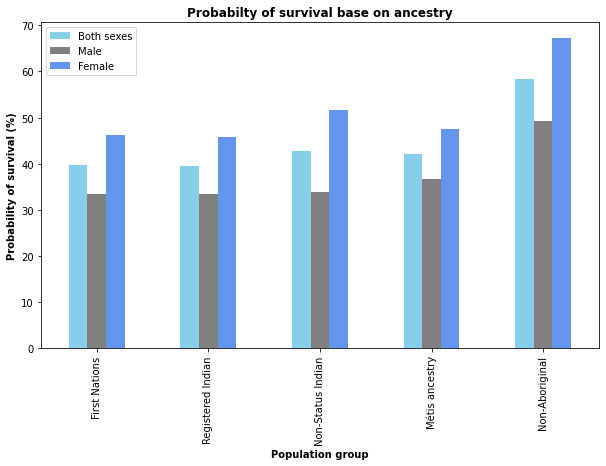

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
style1 = ['skyblue', 'grey', 'cornflowerblue']
survival_by_ancestry.loc['80'].plot.bar(x="Population_group", y=["Both sexes", "Male", "Female"], 
                                  color=style1, ax=ax)
ax.set_ylabel("Probability of survival (%)", fontweight='bold')
ax.set_xlabel("Population group", fontweight='bold')
ax.set_title("Probabilty of survival base on ancestry", fontweight='bold')
#fig.savefig("Probability_survival_ancestry.png")


Regardless of their origins, women have a haigher probability to survive at 80. 

### Probability of survival based on education

In [16]:
#education = survival['Population_group'].str.startswith('Educational')
edu = list(filter(lambda x: x.startswith("Educational"), survival_age.Population_group.unique()))

data = [survival_age.loc[(survival_age.Population_group == t) & (survival_age.Characteristics == 
                     "Probability of survival")] for t in edu]

probability_by_education = data[0].drop(
    columns=["Population_group", "Characteristics"]).rename(
    columns={"VALUE": "Non-graduate"})

probability_by_education["Secondary graduation"] = data[1]['VALUE']
probability_by_education["postsecondary diploma"] = data[2]['VALUE']
probability_by_education["university degree"] = data[3]['VALUE']

probability_by_education.head()


,Sex,Non-graduate,Secondary graduation,postsecondary diploma,university degree
Age,,,,,
25,Both sexes,100.0,100.0,100.0,100.0
25,Males,100.0,100.0,100.0,100.0
25,Females,100.0,100.0,100.0,100.0
30,Both sexes,99.4,99.7,99.8,99.8
30,Males,99.2,99.5,99.7,99.7


Text(0.5, 1.0, '')

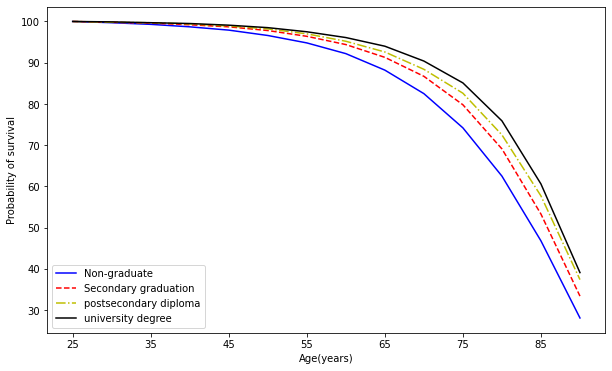

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

males = probability_by_education.loc[probability_by_education.Sex == "Males"]
females = probability_by_education.loc[probability_by_education.Sex == "Females"]

style2 = ['b-','r--','y-.', 'k']
females.plot(style=style2, ax=ax1)

ax1.set_ylabel("Probability of survival")
ax1.set_xlabel("Age(years)")
ax1.set_title("")
#fig.savefig("Probability_survival.png")


It can be observed that the probability of survival inscreasis with the level of education.

### Life expectancy of a 30 year old

In [18]:
expectancy_ = expectancy_age.groupby('Characteristics').get_group('Life expectancy')
#expectancy_.head()


In [19]:
status = ['Income adequacy quintile 1 (lowest)', 
          'Educational attainment - less than secondary graduation', 
          'Shelter', 'Non-Aboriginal']
expectancy_grouped = expectancy_.groupby("Population_group")
expectancy_new = pd.concat([expectancy_grouped.get_group(stat) 
                    for stat in status]).drop(columns="Characteristics")
#expectancy_new.head()

In [20]:
life_expecteancy = expectancy_new.loc[expectancy_new.Sex=="Both sexes"].rename(
    columns={"VALUE": "Both sexes"}).drop(columns="Sex")
life_expecteancy["Male"] = expectancy_new.loc[expectancy_new.Sex==
                                              "Males"]["VALUE"]
life_expecteancy["Female"] = expectancy_new.loc[expectancy_new.Sex==
                                                "Females"]["VALUE"]
life_expecteancy.head()


,Population_group,Both sexes,Male,Female
Age,,,,
25,Income adequacy quintile 1 (lowest),51.6,48.2,55.0
30,Income adequacy quintile 1 (lowest),46.9,43.6,50.2
35,Income adequacy quintile 1 (lowest),42.2,39.0,45.4
40,Income adequacy quintile 1 (lowest),37.5,34.4,40.6
45,Income adequacy quintile 1 (lowest),33.0,29.9,36.0


[Text(0, 0, 'Low income'),
 Text(1, 0, 'Non-graduate'),
 Text(2, 0, 'Shelter'),
 Text(3, 0, 'Non-arboriginal')]

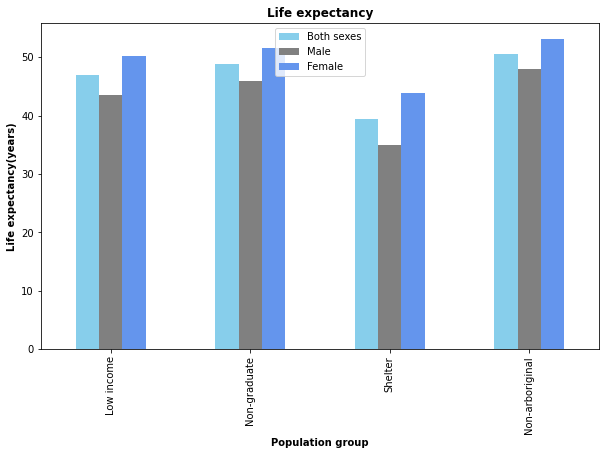

In [21]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
life_expecteancy.loc['30'].plot.bar(x="Population_group", y=["Both sexes", "Male", "Female"], 
                                  color=style1, ax=ax2)
ax2.set_ylabel("Life expectancy(years)", fontweight='bold')
ax2.set_xlabel("Population group", fontweight='bold')
ax2.set_title("Life expectancy", fontweight='bold')
sticks = ['Low income', 'Non-graduate', 'Shelter', 'Non-arboriginal']
ax2.set_xticklabels(sticks)
#fig.savefig("Life_expectancy.png")